In [5]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from operator import itemgetter
from nltk import flatten
import math
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [6]:
data = pd.read_csv('Market_Basket.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="font-family: B Nazanin; font-size: 26px; font-weight: bold; dir: rtl">سوال ۱</div>

In [7]:
data_list = data.values.tolist()
transactions = [[x for x in y if not pd.isnull(x)] for y in data_list]
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [8]:
import itertools
total_items = list(itertools.chain.from_iterable(transactions))
values, counts = np.unique(total_items, return_counts=True)
zip_iterator = zip(values, counts)
count_dictionary = dict(zip_iterator)
count_dictionary

{' asparagus': 1,
 'almonds': 153,
 'antioxydant juice': 67,
 'asparagus': 35,
 'avocado': 250,
 'babies food': 34,
 'bacon': 65,
 'barbecue sauce': 81,
 'black tea': 107,
 'blueberries': 69,
 'body spray': 86,
 'bramble': 14,
 'brownies': 253,
 'bug spray': 65,
 'burger sauce': 44,
 'burgers': 654,
 'butter': 226,
 'cake': 608,
 'candy bars': 73,
 'carrots': 115,
 'cauliflower': 36,
 'cereals': 193,
 'champagne': 351,
 'chicken': 450,
 'chili': 46,
 'chocolate': 1230,
 'chocolate bread': 32,
 'chutney': 31,
 'cider': 79,
 'clothes accessories': 63,
 'cookies': 603,
 'cooking oil': 383,
 'corn': 36,
 'cottage cheese': 239,
 'cream': 7,
 'dessert wine': 33,
 'eggplant': 99,
 'eggs': 1348,
 'energy bar': 203,
 'energy drink': 200,
 'escalope': 595,
 'extra dark chocolate': 90,
 'flax seed': 68,
 'french fries': 1282,
 'french wine': 169,
 'fresh bread': 323,
 'fresh tuna': 167,
 'fromage blanc': 102,
 'frozen smoothie': 475,
 'frozen vegetables': 715,
 'gluten free bar': 52,
 'grated che

In [9]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


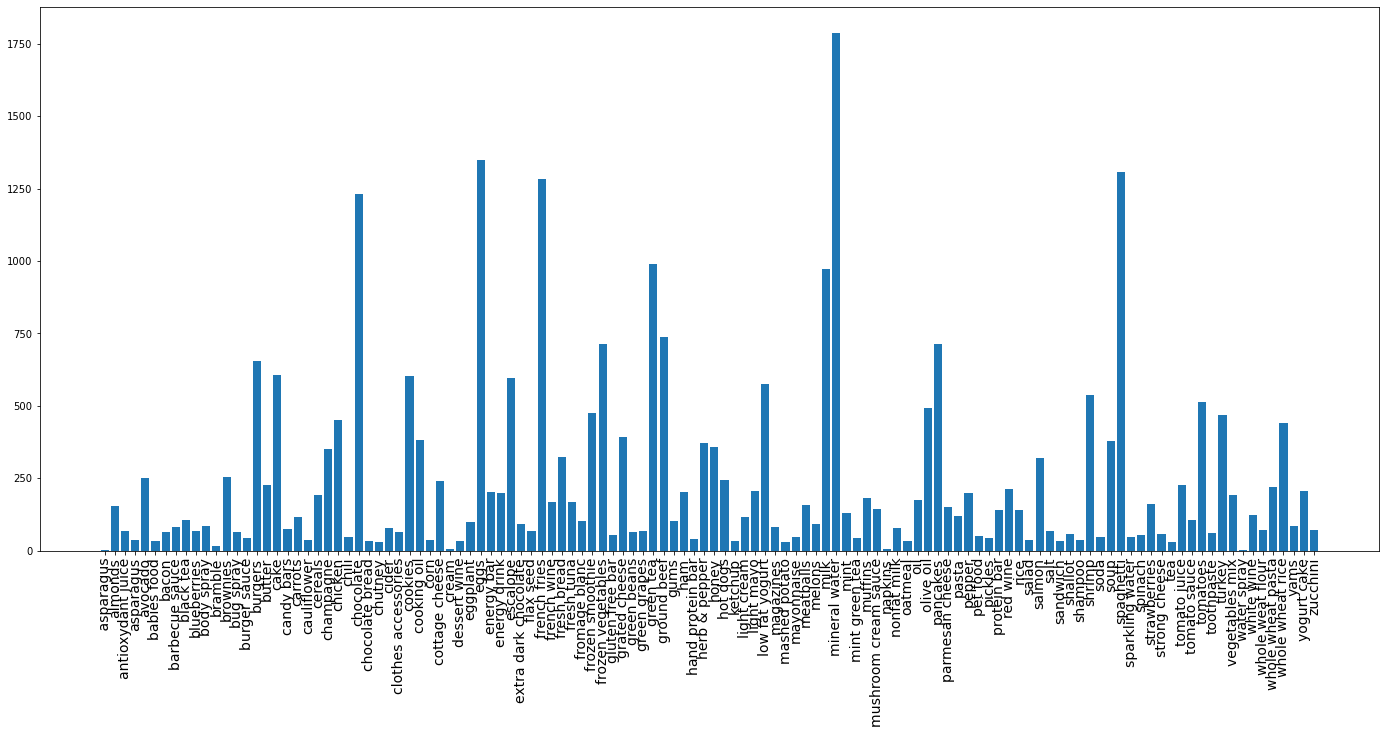

In [10]:
figure, axis = plt.subplots()
plt.setp(axis.get_xticklabels(), fontsize=14, rotation='vertical')
axis.bar(count_dictionary.keys(), count_dictionary.values())
figure = plt.gcf()
figure.set_size_inches(24, 10)
figure.savefig('histogram_items.png', dpi=200)

<div style="font-family: B Nazanin; font-size: 26px; font-weight: bold; dir: rtl">سوال ۲</div>

<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">الف</div>

In [11]:
len(data)

7501

<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">ب</div>

In [12]:
len(count_dictionary.keys())

120

<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">ج</div>

In [13]:
 dict(sorted(count_dictionary.items(), key = itemgetter(1), reverse = True)[:5])

{'mineral water': 1788,
 'eggs': 1348,
 'spaghetti': 1306,
 'french fries': 1282,
 'chocolate': 1230}

<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">د</div>

In [14]:
count_dictionary["black tea"]

107

<div style="font-family: B Nazanin; font-size: 26px; font-weight: bold; dir: rtl">سوال ۳</div>

<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">الف</div>

In [15]:
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] == 2) ]

,support,itemsets,length
115,0.005199,"(burgers, almonds)",2
116,0.003066,"(cake, almonds)",2
117,0.005999,"(almonds, chocolate)",2
118,0.006532,"(almonds, eggs)",2
119,0.004399,"(french fries, almonds)",2
...,...,...,...
896,0.003200,"(tomato juice, turkey)",2
897,0.006532,"(tomatoes, turkey)",2
898,0.003200,"(tomatoes, vegetables mix)",2
899,0.005999,"(whole wheat rice, tomatoes)",2


In [16]:
frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] == 2) ]

,support,itemsets,length
36,0.033196,"(chocolate, eggs)",2
37,0.034395,"(french fries, chocolate)",2
38,0.032129,"(chocolate, milk)",2
39,0.052660,"(chocolate, mineral water)",2
40,0.039195,"(chocolate, spaghetti)",2
41,0.036395,"(french fries, eggs)",2
42,0.030796,"(eggs, milk)",2
43,0.050927,"(mineral water, eggs)",2
44,0.036528,"(eggs, spaghetti)",2
45,0.033729,"(french fries, mineral water)",2


In [17]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[ (frequent_itemsets['length'] == 2) ]

,support,itemsets,length


<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">ج</div>

In [18]:
fpgrowth(df, min_support=0.05, use_colnames=True)

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


<div style="font-family: B Nazanin; font-size: 26px; font-weight: bold; dir: rtl">سوال ۴</div>

In [19]:
frequent_itemsets=apriori(df, min_support=0.03, use_colnames=True)

<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">الف</div>

In [25]:
assoc = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
assoc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827
2,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
6,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581
7,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070
8,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232
9,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640


In [28]:
assoc.shape[0]

27

In [26]:
assoc.nlargest(3, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
18,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
17,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401


<div style="font-family: B Nazanin; font-size: 20px; font-weight: bold; dir: rtl">ب</div>

In [30]:
assoc = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.35)
assoc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
1,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
2,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
3,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
4,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529


In [31]:
assoc.shape[0]

5